In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.widgets import LassoSelector
from matplotlib.path import Path

%matplotlib notebook

In [5]:
class SelectFromCollection(object):
    """Select indices from a matplotlib collection using `LassoSelector`.

    Selected indices are saved in the `ind` attribute. This tool highlights
    selected points by fading them out (i.e., reducing their alpha values).
    If your collection has alpha < 1, this tool will permanently alter them.

    Note that this tool selects collection objects based on their *origins*
    (i.e., `offsets`).

    Parameters
    ----------
    ax : :class:`~matplotlib.axes.Axes`
        Axes to interact with.

    collection : :class:`matplotlib.collections.Collection` subclass
        Collection you want to select from.

    alpha_other : 0 <= float <= 1
        To highlight a selection, this tool sets all selected points to an
        alpha value of 1 and non-selected points to `alpha_other`.
    """

    def __init__(self, ax, collection, alpha_other=0.3):
        self.canvas = ax.figure.canvas
        self.collection = collection
        self.alpha_other = alpha_other

        self.xys = collection.get_offsets()
        self.count = len(self.xys)

        # Ensure that we have separate colors for each object
        self.fc = collection.get_facecolors()
        if len(self.fc) == 0:
            raise ValueError('Collection must have a facecolor')
        elif len(self.fc) == 1:
            self.fc = np.tile(self.fc, self.count).reshape(self.count, -1)

        self.lasso = LassoSelector(ax, onselect=self.onselect)
        self.ind = []
        
    @property
    def selected(self):
        return np.array(self.xys[selector.ind])
        
    def onselect(self, verts):
        path = Path(verts)
        self.ind = np.nonzero([path.contains_point(xy) for xy in self.xys])[0]
        self.fc[:, -1] = self.alpha_other
        self.fc[self.ind, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()

    def disconnect(self):
        self.lasso.disconnect_events()
        self.fc[:, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()

<IPython.core.display.Javascript object>


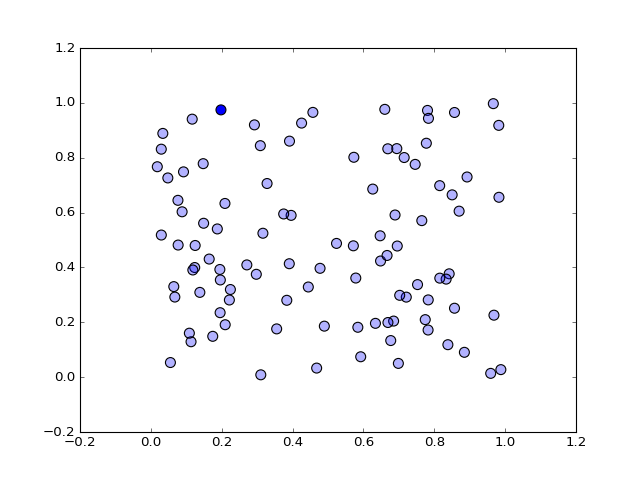

In [6]:
data = np.random.rand(100, 2)
fig, ax = plt.subplots()
pts = ax.scatter(data[:, 0], data[:, 1], s=80)
selector = SelectFromCollection(ax, pts)

plt.show()

In [4]:
selector.xys[selector.ind]

array([[ 0.47233732,  0.7737041 ],
       [ 0.65869968,  0.92501026],
       [ 0.62456945,  0.86782077],
       [ 0.60115568,  0.94312613],
       [ 0.9904592 ,  0.90784643],
       [ 0.73456536,  0.86026399],
       [ 0.5865706 ,  0.79786597],
       [ 0.59569635,  0.76936377],
       [ 0.99145357,  0.94669949],
       [ 0.52348771,  0.74977895],
       [ 0.96128915,  0.79120092],
       [ 0.77289246,  0.88704064],
       [ 0.49327182,  0.99976971],
       [ 0.75989085,  0.74821735],
       [ 0.49045557,  0.8545565 ],
       [ 0.82485039,  0.96694131],
       [ 0.69966306,  0.74097429]])